# Topic-Modelle

In diesem Teil wirst du *Topic-Modelle* kennenlernen. Sie dienen hauptsächlich dazu, die verborgene ("latente") Struktur von großen Mengen an Text-Dokumenten zu erkennen.

In der folgenden Grafik sind die *Topics* entscheidend und erst in zweiter Linie die Zuordnung zu den individuellen Dokumenten. Das ist ein erheblicher Unterschied zum Clustering, das du schon kennengelernt hast. Dazu kommt noch, das Topic-Modelle einem Dokument nicht ein einziges Topic zuordnen, sondern immer mehrere. Sprache ist ein ambivalentes Medium, das passt also auch ganz gut:

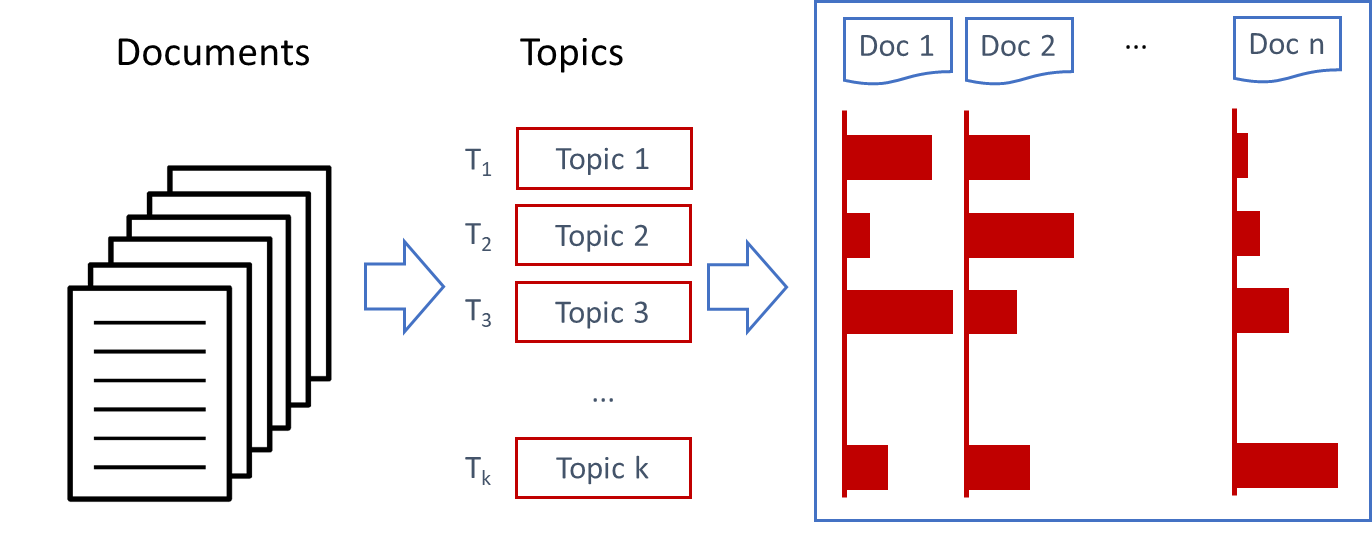

## Datenset und Vektorisierung

Für Topic-Modelle benötigst du Text. `scikit-learn` hat auch hierfür geeignete Datensätze im Angebot, du nutzt hier das Datenset mit den historischen Newsgroup-Posts:

In [1]:
from sklearn import datasets
news = datasets.fetch_20newsgroups()

Um die Daten zu vektorisieren, nutzt du u.a. *Stoppworte*. Damit du hier nich das gesamte Paket `spacy` installieren musst, stehen dessen Stoppworte (und noch ein paar mehr, die für Newsgroups spezifisch sind) hier im Notebook:

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
STOPWORDS = {'none', 'thereby', 'mine', 'serious', 'whereafter', 'nothing', "'ll", 
             'itself', 'first', 'whoever', '’ve', 'noone', 'moreover', 'regarding', 
             'but', 'various', 'and', 'their', 'between', 'everyone', 'us', 'other', 
             'third', 'last', 'only', 'been', 'always', 'throughout', 'over', 'anyhow', 
             'i', 'nobody', 'be', 'off', "'d", 'then', 'eleven', 'since', "'ve", 'did', 
             'ever', 'than', 'call', 'few', 'could', 'whatever', 'front', 'there', 
             'across', 'whenever', 'is', 'this', 'empty', 'indeed', 'please', 'namely', 
             'his', 'eight', 'those', 'hence', 'wherein', 'amongst', 'using', 'both', 
             '’re', 'seem', 'two', 'several', 'whether', 'about', 'due', 'behind', 'am', 
             'what', 'name', 'has', 'three', 'therefore', '‘s', 'whereas', 'the', 'until', 
             'meanwhile', 'anything', 'that', 'never', 'how', 'sometimes', 'each', 
             'toward', 'doing', 'someone', 'at', 'hereafter', 'almost', 'if', 'same', 
             'her', 'anyone', 'became', 'into', 'latter', 'by', "'s", 'four', 'wherever', 
             'besides', 'must', 'thence', 'in', 'anywhere', 'any', 'twelve', 'out', 'it', 
             'one', 'least', 'used', '‘ll', 'put', 'therein', 'a', 're', 'she', 'are', 
             'beforehand', 'my', 'through', 'ten', 'go', 'too', '’m', 'either', 'below', 
             'else', 'around', 'all', 'except', 'n‘t', 'not', 'such', '‘re', 'was', '’s', 
             'may', 'whence', 'also', 'another', 'beyond', 'without', 'perhaps', 'alone', 
             'should', 'nevertheless', 'own', 'he', 'these', 'seemed', 'give', 'made', 
             'some', 'part', 'on', 'himself', 'hereupon', 'whereupon', 'six', 'via', 'of', 
             'quite', "'m", 'however', 'onto', 'as', 'sometime', 'more', 'while', 'sixty', 
             'does', 'everywhere', 'elsewhere', 'whither', 'who', 'nor', 'seeming', 
             'formerly', 'nowhere', 'our', 'former', 'hereby', 'further', "'re", 
             'can', 'thus', 'something', 'why', 'themselves', 'were', 'amount', 'do', 
             'we', 'beside', 'mostly', 'they', 'very', 'your', 'somewhere', 'upon', 'so', 
             'them', 'latterly', 'neither', 'within', 'enough', 'hers', 'cannot', 'you', 
             'every', 'most', 'ca', 'show', 'will', 'being', 'after', 'though', 'fifteen', 
             'down', 'really', 'although', 'full', 'up', 'well', 'somehow', 'yourself', 'me', 
             'bottom', 'next', 'many', 'unless', 'or', 'anyway', 'five', 'for', 'say', 
             'twenty', 'would', 'otherwise', 'nine', 'no', 'against', 'ourselves', 'just', 
             'even', 'yet', 'above', '‘d', 'again', 'already', 'others', 'before', 'forty', 
             'here', 'move', '‘m', "n't", 'with', 'now', 'seems', 'n’t', 'among', 'which', 
             'towards', 'side', 'still', 'might', 'together', '’ll', 'from', 'everything', 
             'have', 'becoming', 'keep', 'become', 'often', 'herein', 'under', 'whereby', 
             'top', 'thru', 'becomes', 'where', 'along', 'during', 'whole', 'him', 'once', 
             'to', 'afterwards', 'back', 'its', 'get', 'rather', 'because', 'hundred', 
             'make', 'see', 'thereafter', 'done', 'thereupon', 'had', '‘ve', 'ours', 
             'yours', 'much', 'an', 'per', 'whose', 'fifty', 'myself', 'take', 'less', 
             'whom', 'yourselves', 'when', 'herself', '’d',
             'edu', 'university', 'article', 'writes', 'posting', 'nntp', 'host', 
             'organization', 'subject', 'state', 'com', 'netcom', 'uk', 'ac', 'cs', 
             'caltech', 'gov', 'jpl' }

Je nach Topic-Modell musst du unterschiedlich vektorisieren. Für das erste Verfahren, die nicht-negative Matrixfaktorisierung, solltest du TF/IDF verwenden:

In [3]:
tfidf = TfidfVectorizer(stop_words = STOPWORDS)
vec = tfidf.fit_transform(news["data"])

/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


## Topic-Modell mit NMF

Dieses Verfahren wendest du an, um die *Document-Term-Matrix* zu faktorisieren. Das ist immer möglich, denn die Matrix ist *positiv-semidefinit*. Nachdem du die Anzahl der Topics klein halten möchtest, ist die Lösung hier approximativ zu verstehen:

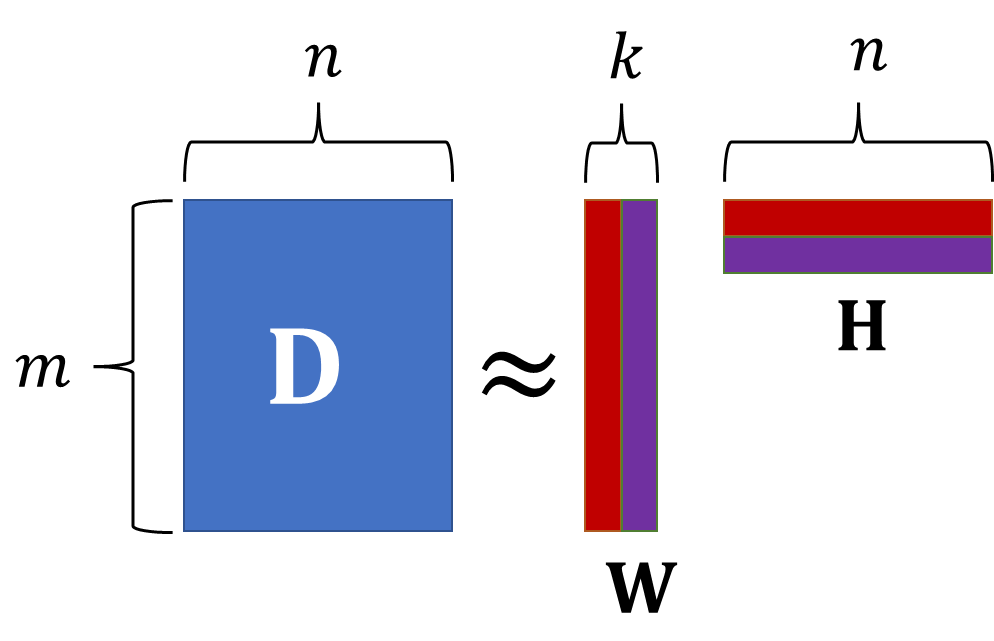

Wie bei (fast) allen Verfahren ist die Anzahl der Topics ein sog. Hyperparameter. Entweder du versuchst, diesen zu erraten oder du probierst unterschiedliche Varianten aus. Später wirst du Qualitätskriterien kennenlernen, anhand derer du die Auswahl optimieren kannst. Hier startest du mit `10`:

In [4]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 10, random_state=42)
nmf.fit(vec)

/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=10, random_state=42)

Um die Topics darstellen zu können, nutzt du sinnvollerweise einige Hilfsfunktionen:

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def wordcloud_topic_model_summary(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        # dict zur Speicherung der häufigsten Wörter
        freq = {}
        # nur die letzten (häufigsten) Wörter verwenden
        for i in topic.argsort()[:-no_top_words - 1:-1]:
            freq[feature_names[i].replace(" ", "_")] = topic[i]
        # Wordcloud dafür aufbauen
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(freq)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off");
        plt.show()
        plt.close()
            
def display_topics(model, feature_names, no_top_words):
    # wie oben, nur als Text
    for topic_idx, topic in enumerate(model.components_):
        first_index = topic.argsort()[-1]
        print("Topic %s (%02d):" % (feature_names[first_index], topic_idx))
        print(" ".join(["'"+feature_names[i]+"'"
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

Die Ergebnisse kannst du damit schnell anzeigen und sie sind gut interpretierbar:

In [7]:
display_topics(nmf, tfidf.get_feature_names(), 10)

Topic people (00):
'people' 'don' 'gun' 'like' 'car' 'think' 'space' 'nasa' 'good' 'know'
Topic god (01):
'god' 'jesus' 'bible' 'christians' 'christian' 'believe' 'faith' 'people' 'christ' 'church'
Topic key (02):
'key' 'clipper' 'encryption' 'chip' 'escrow' 'keys' 'government' 'algorithm' 'security' 'crypto'
Topic team (03):
'team' 'game' 'hockey' 'games' 'players' 'year' 'season' 'play' 'nhl' 'win'
Topic pitt (04):
'pitt' 'geb' 'gordon' 'banks' 'cadre' 'n3jxp' 'dsl' 'chastity' 'shameful' 'skepticism'
Topic israel (05):
'israel' 'israeli' 'jews' 'arab' 'cleveland' 'lebanese' 'arabs' 'jake' 'peace' 'israelis'
Topic scsi (06):
'scsi' 'drive' 'ide' 'controller' 'drives' 'bus' 'hard' 'disk' 'mac' 'isa'
Topic keith (07):
'keith' 'sgi' 'livesey' 'morality' 'wpd' 'solntze' 'objective' 'jon' 'moral' 'schneider'
Topic windows (08):
'windows' 'file' 'window' 'dos' 'card' 'thanks' 'use' 'lines' 'files' 'program'
Topic armenian (09):
'armenian' 'turkish' 'armenians' 'armenia' 'argic' 'serdar' 'tu

/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Einige Topics sind etwas *sperrig*, das liegt an der Menge der Dokumente. Möglicherweise wären auch mehr Stopwords sinnvoll, wie etwa `n3jxp` - das kannst du selbst ausprobieren.

Etwas intuitiver ist die Darstellung mit Wordclouds:

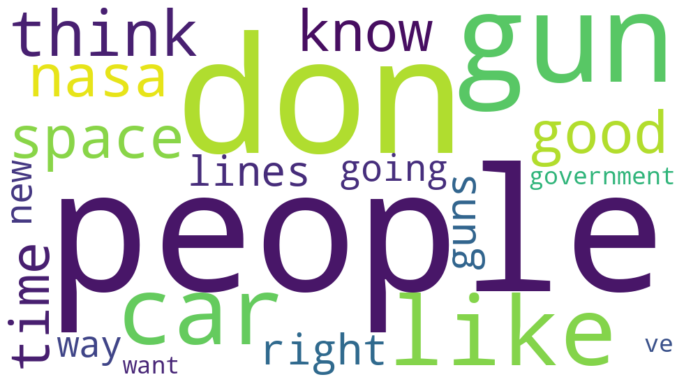

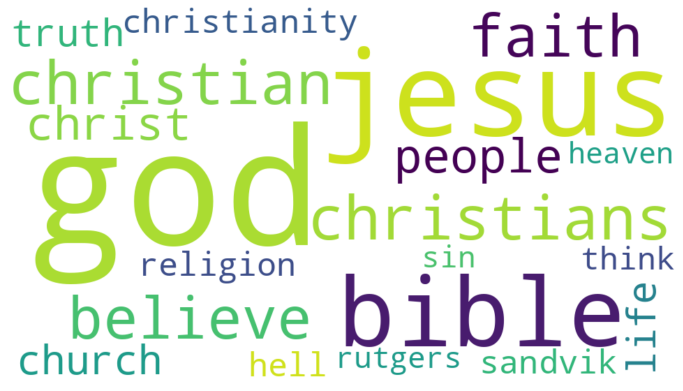

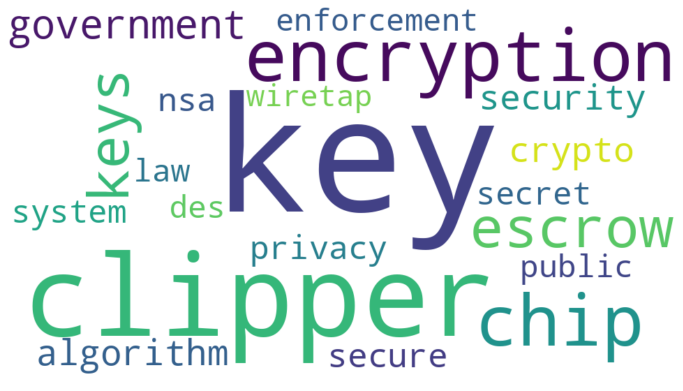

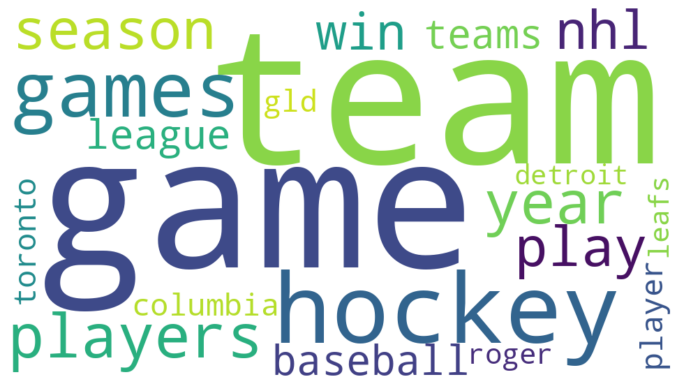

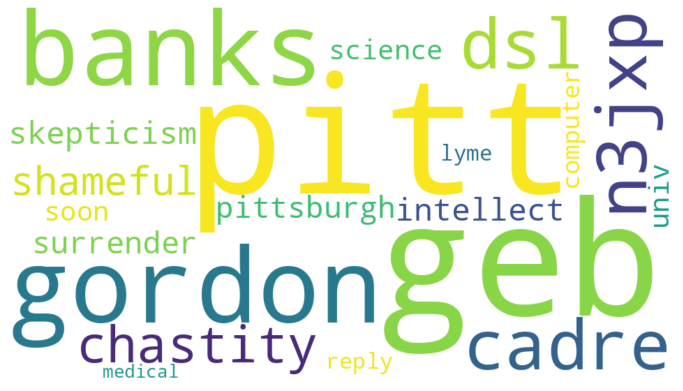

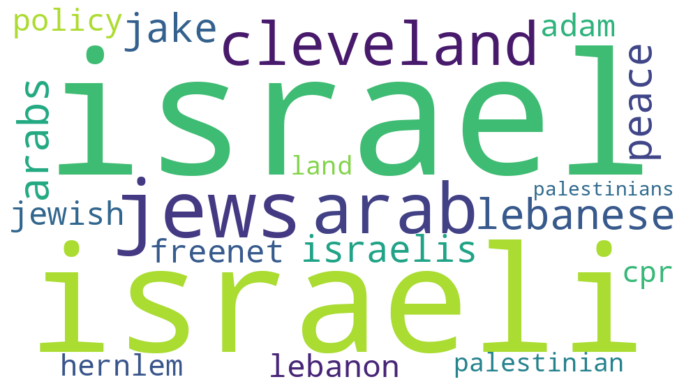

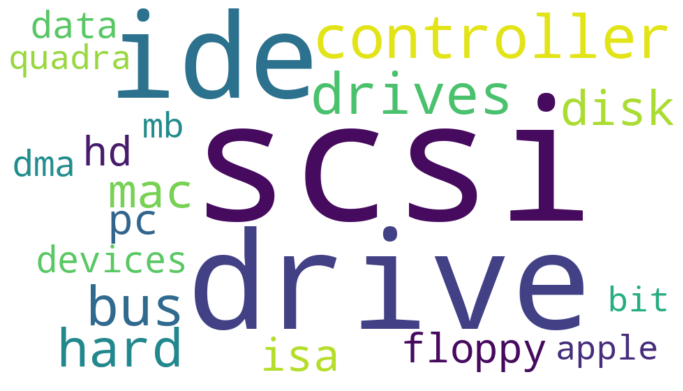

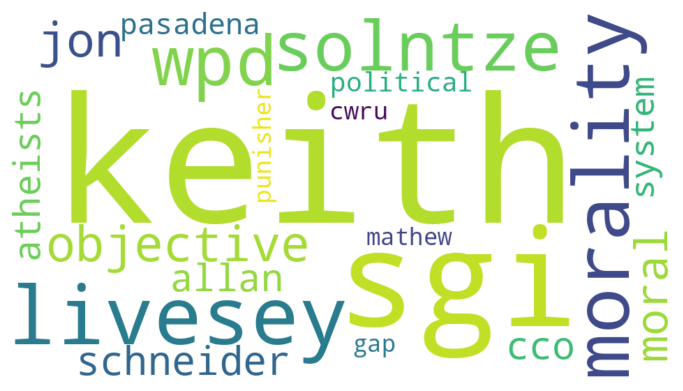

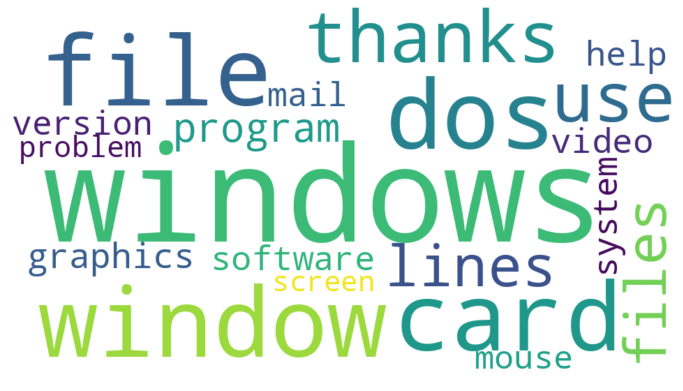

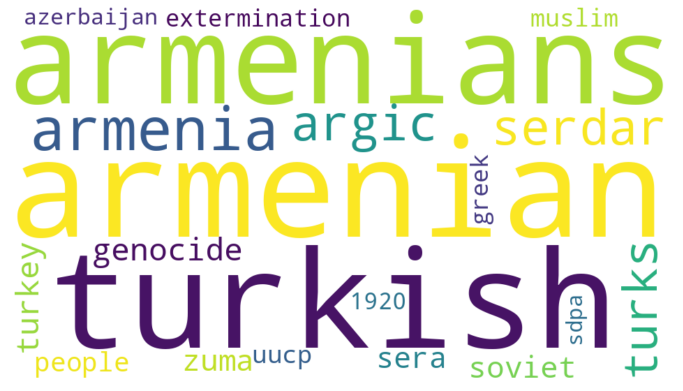

In [8]:
wordcloud_topic_model_summary(nmf, tfidf.get_feature_names(), 20)

## LDA

LDA, die sog. *Latent Dirichlet Allocation*, ist das bei weitem bekannteste und populärste Verfahren für Topic-Modelle. Es ist ebenso wie NMF in `scikit-learn` integriert:

In [11]:
from sklearn.decomposition import LatentDirichletAllocation

Im Gegensatz zu NMF benötigt LDA unbedingt die Bag-of-Words-Vektoren, die *nicht* mit der invertierten Dokumentenfrequenz skaliert sind. Die Entscheidung, welche Wörter wichtig sind und welche nicht, trifft LDA selbst.

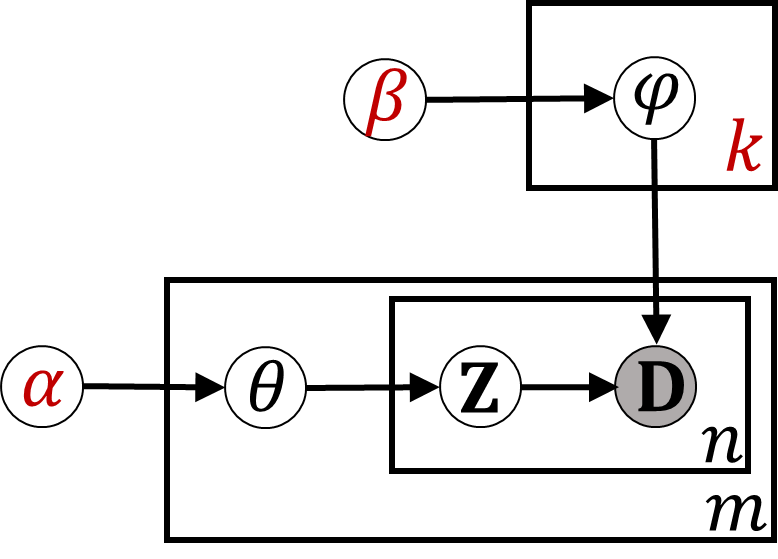

In [9]:
cv = TfidfVectorizer(stop_words = STOPWORDS, use_idf=False)
cvec = cv.fit_transform(news["data"])

/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


Der Aufruf ist identisch zu NMF, allerdings ist die Rechenzeit deutlich länger.:

In [12]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(cvec)

LatentDirichletAllocation(random_state=42)

Betrachte nun das Ergebnis:

In [13]:
display_topics(lda, cv.get_feature_names(), 10)

Topic fourd (00):
'fourd' 'ashok' 'omen' 'sq' 'gehrels' 'rmit' 'shafer' 'jr0930' 'jfc' '0565'
Topic nokia (01):
'nokia' 'schiewer' 'todamhyp' 'apgea' 'dlneal' '80386' 'gadgets' 'tnclus' 'inland' 'anl'
Topic yeast (02):
'yeast' 'candida' 'rind' 'bih' 'nthu' 'wray' 'liturgy' 'albicans' 'nmm' 'yob'
Topic lines (03):
'lines' 'like' 'don' 'know' 'people' 'think' 'new' 'good' 'distribution' 'time'
Topic kth (04):
'kth' 'baalke' 'larc' 'rauser' 'adl' 'nada' 'babb' 'egalon' 'gainey' 'uv'
Topic dartmouth (05):
'dartmouth' 'tamu' 'blah' 'dresden' 'hiram' 'inf' 'fc' 'bmug' 'hades' 'synoptics'
Topic ax (06):
'ax' 'mq' 'mpce' '706' '542' 'tw' '30602' '0358' '7415' 'n4tmi'
Topic intercon (07):
'intercon' 'amanda' 'dyer' 'larc' 'hernlem' 'spdcc' 'dwarner' 'rahul' 'journalism' 'noring'
Topic topaz (08):
'topaz' 'steinly' 'needles' 'ndw' 'canterbury' 'ritvax' 'steinn' 'sigurdsson' 'oscs' 'harkey'
Topic megatek (09):
'megatek' 'cacs' 'pgf' 'fraering' 'dazixco' 'clesun' 'nstramer' 'nuet_ke' 'naftaly' 'sr

Im Vergleich zu NMF ist das sehr enttäuschend. Einige Topics sind gut erklärbar, der größte Teil allerdings nicht. Mit den Qualitätskriterien wirst du später feststellen, ob da auch "objektiv" schlechter ist.

Betrachte nun auch die Wordclouds:

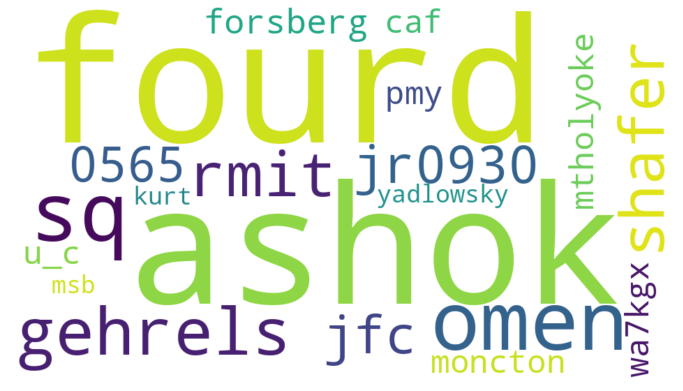

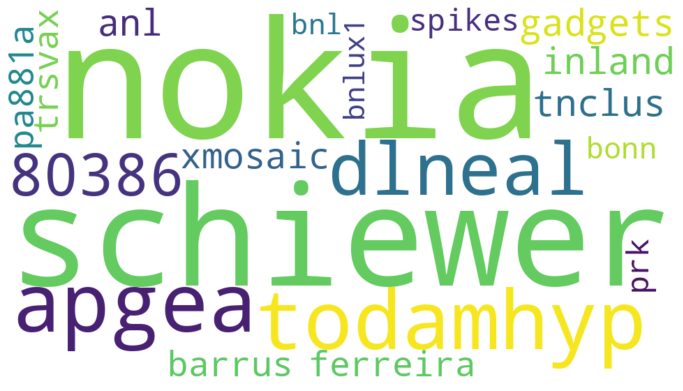

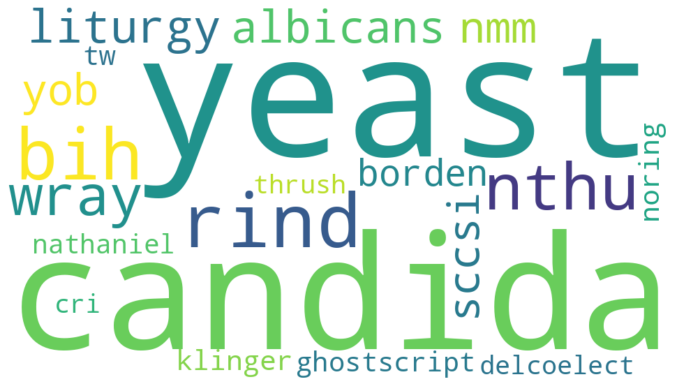

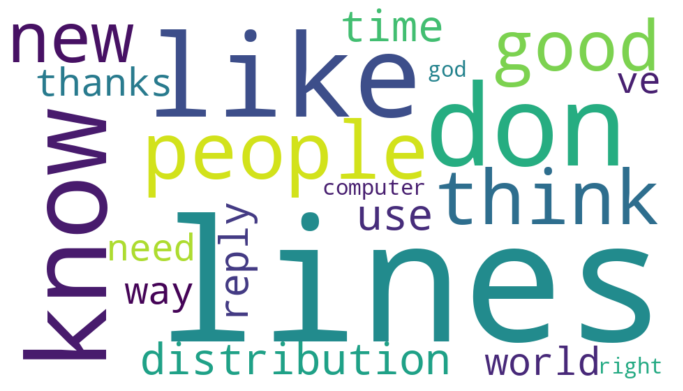

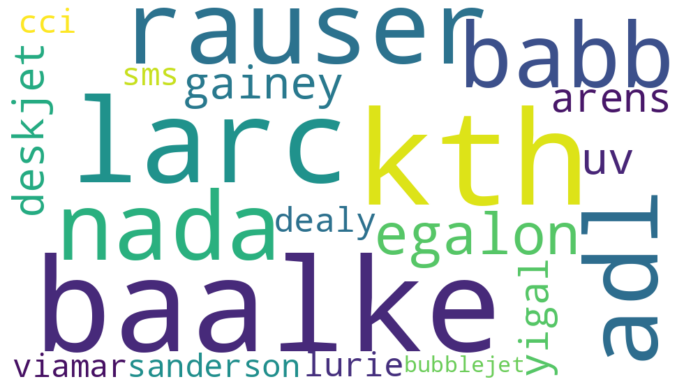

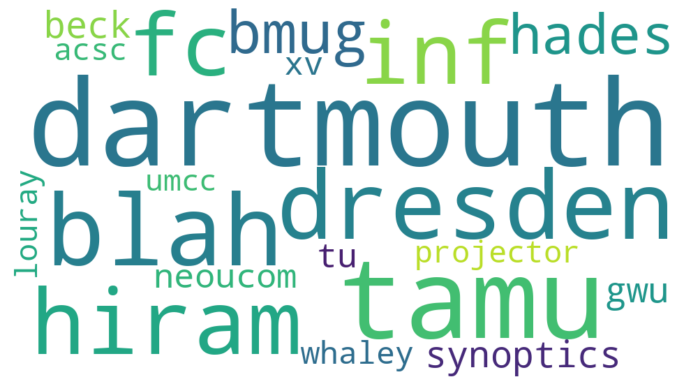

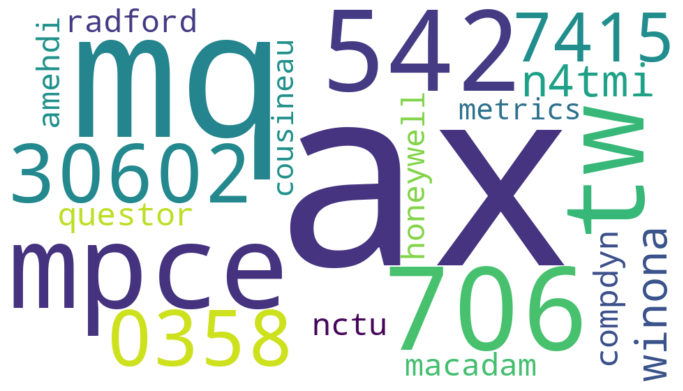

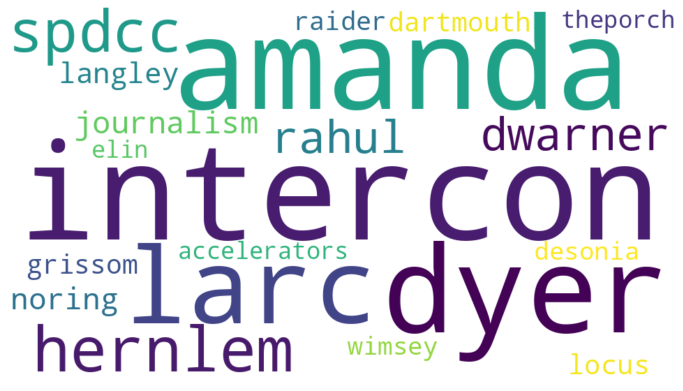

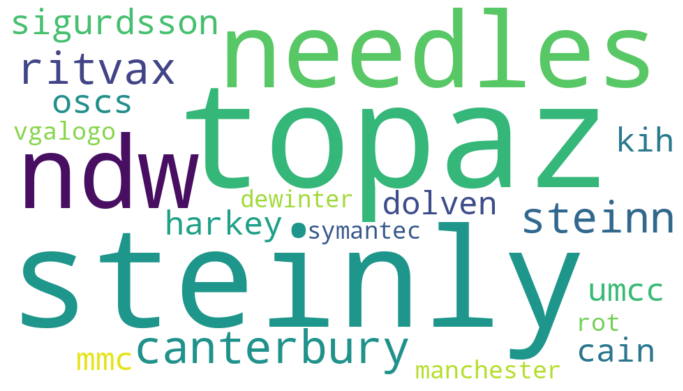

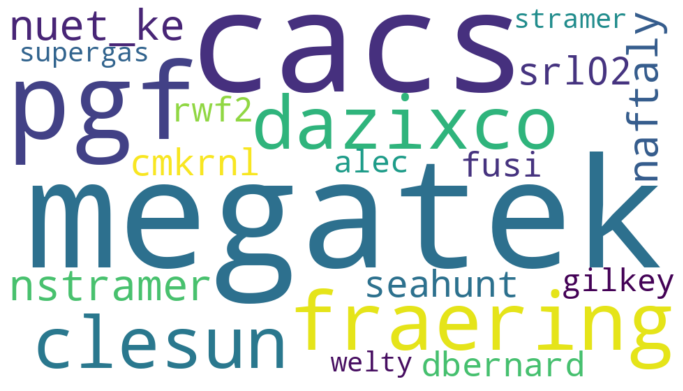

In [14]:
wordcloud_topic_model_summary(lda, cv.get_feature_names(), 20)

## Topic-Modelle sind gut zur Strukturierung geeignet

Wie du gesehen hast, kannst du über Topic-Modelle schnell feststellen, wie eine Dokumentenmenge strukturiert ist. Nicht alle Topic-Modelle funktionieren dabei gleich gut.